In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/archive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/archive


In [3]:
ls -a

1.benign.csv          4.gafgyt.scan.csv     7.gafgyt.combo.csv
1.gafgyt.combo.csv    4.gafgyt.tcp.csv      7.gafgyt.junk.csv
1.gafgyt.junk.csv     4.gafgyt.udp.csv      7.gafgyt.scan.csv
1.gafgyt.scan.csv     4.mirai.ack.csv       7.gafgyt.tcp.csv
1.gafgyt.tcp.csv      4.mirai.scan.csv      7.gafgyt.udp.csv
1.gafgyt.udp.csv      4.mirai.syn.csv       8.benign.csv
1.mirai.ack.csv       4.mirai.udp.csv       8.gafgyt.combo.csv
1.mirai.scan.csv      4.mirai.udpplain.csv  8.gafgyt.junk.csv
1.mirai.syn.csv       5.benign.csv          8.gafgyt.scan.csv
1.mirai.udp.csv       5.gafgyt.combo.csv    8.gafgyt.tcp.csv
1.mirai.udpplain.csv  5.gafgyt.junk.csv     8.gafgyt.udp.csv
2.benign.csv          5.gafgyt.scan.csv     8.mirai.ack.csv
2.gafgyt.combo.csv    5.gafgyt.tcp.csv      8.mirai.scan.csv
2.gafgyt.junk.csv     5.gafgyt.udp.csv      8.mirai.syn.csv
2.gafgyt.scan.csv     5.mirai.ack.csv       8.mirai.udp.csv
2.gafgyt.tcp.csv      5.mirai.scan.csv      8.mirai.udpplain.csv
2.gafgyt.udp.csv   

1: Danmini
2: Ennio
3: Ecobee
4: Phllips B120N/10
5: Provision PT-737E
6: Provision PT-838
7: SimpleHome XCS7-1002-WHT
8: SimpleHome XCS7-1003-WHT
9: Samsung SNH 1011 N

Mirai Attacks:
1: Scan: Automatic scanning for vulnerable deices
2: Ack: Ack flooding
3: Syn: Syn flooding
4: UDP: UDP flooding
5: UDPplain: UDP flooding with fewer options, optimized for higher packets per second

In [4]:
ex = pd.read_csv("1.benign.csv", low_memory=False)
ex.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [5]:
print(ex.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'HpHp_L0.01_weight', 'HpHp_L0.01_mean', 'HpHp_L0.01_std',
       'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius', 'HpHp_L0.01_covariance',
       'HpHp_L0.01_pcc'],
      dtype='object', length=115)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


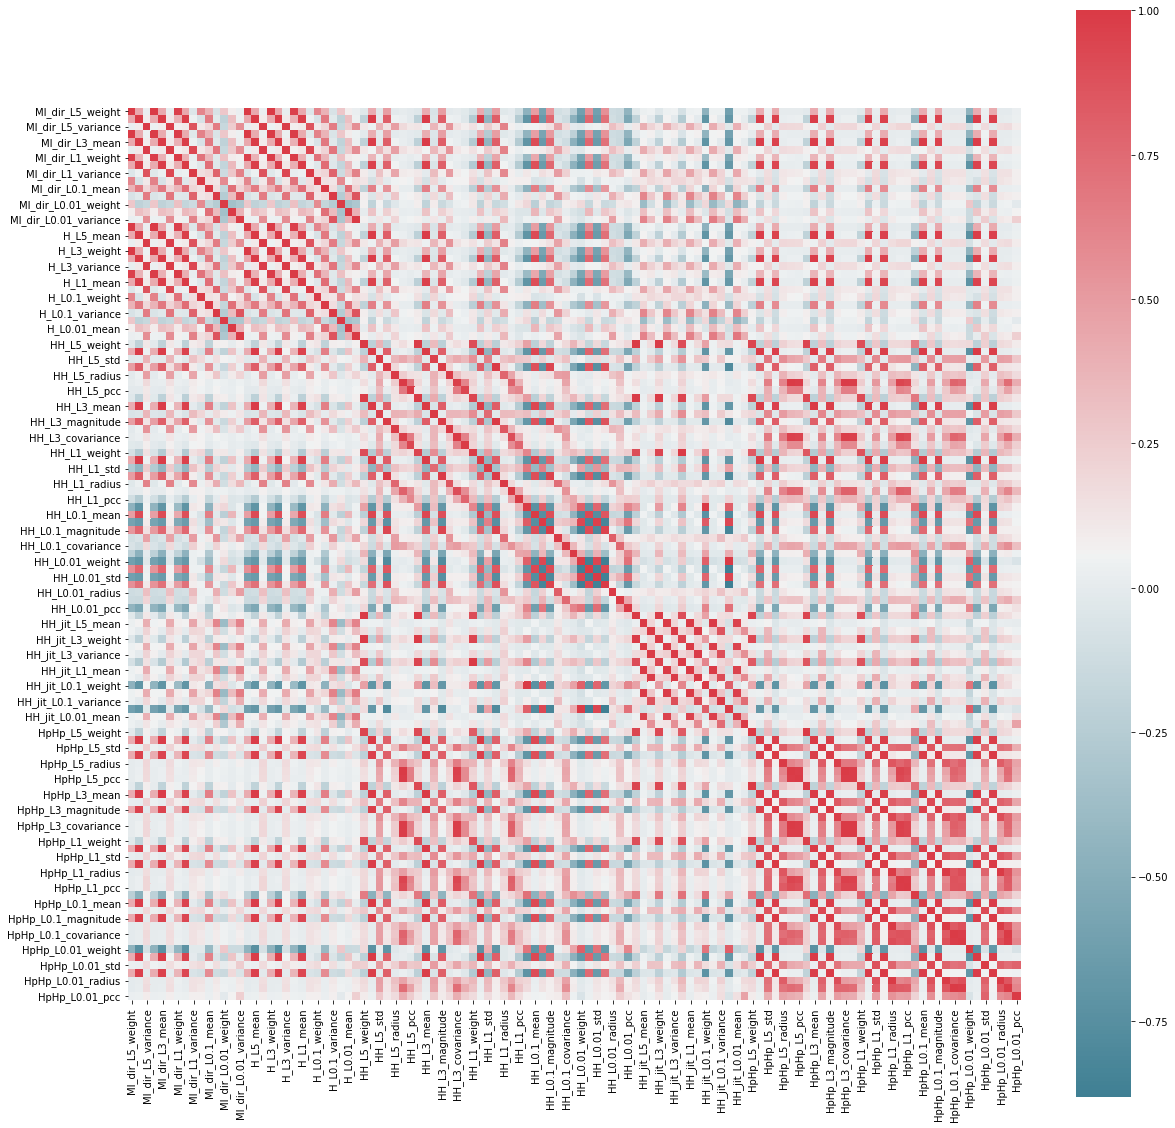

In [6]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 20))
corr = ex.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Combine all files into one mega dataframe. Label 1 for benign, -1 for Mirai

In [7]:
import os

train_dataset = pd.DataFrame()
for filename in os.listdir('/content/drive/My Drive/archive'):
    if 'benign' in filename:
      temp_benign = pd.read_csv(filename, low_memory=False)
      temp_benign['Label'] = 1
      train_dataset = pd.concat([train_dataset, temp_benign])
    if 'mirai' in filename:
      temp_att = pd.read_csv(filename, low_memory=False)
      temp_att['Label'] = -1
      train_dataset = pd.concat([train_dataset, temp_att])


train_dataset.head()        

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,1
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,1
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,1
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1


Commented out because time taken to run is too long. Results printed out have been saved below.

In [8]:
# from statistics import variance

# variances = []
# for col in train_dataset.columns:
#   variances.append((col, variance(train_dataset[col])))

# variances = sorted(variances, key=lambda x: x[1], reverse=True)

In [9]:
# print(variances[:10])

[('HH_jit_L0.01_variance', 2.2137053899558757e+32), ('HH_jit_L0.1_variance', 1.3479124214159963e+32), ('HH_jit_L1_variance', 7.312970683753372e+31), ('HH_jit_L3_variance', 4.548207872407182e+31), ('HH_jit_L5_variance', 3.518939109368206e+31), ('HH_jit_L5_mean', 5.303909919804343e+17), ('HH_jit_L3_mean', 5.303722743497584e+17), ('HH_jit_L1_mean', 5.303224795183743e+17), ('HH_jit_L0.1_mean', 5.3020421024666157e+17), ('HH_jit_L0.01_mean', 5.299513252088283e+17)]

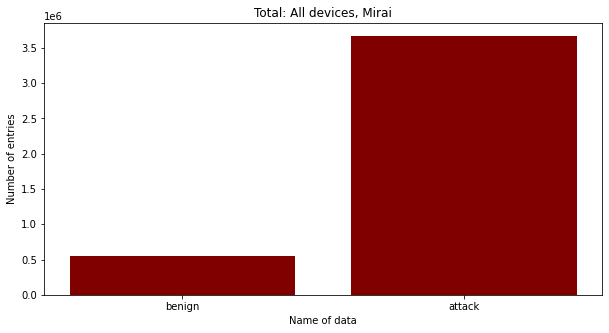

In [10]:
names = ['benign', 'attack']
num = [train_dataset[train_dataset.Label == 1].shape[0], train_dataset[train_dataset.Label == -1].shape[0]] 
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
 
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Total: All devices, Mirai")
plt.show()

Split dataset first to prevent data snooping

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_dataset, test_size=0.10, random_state=42)

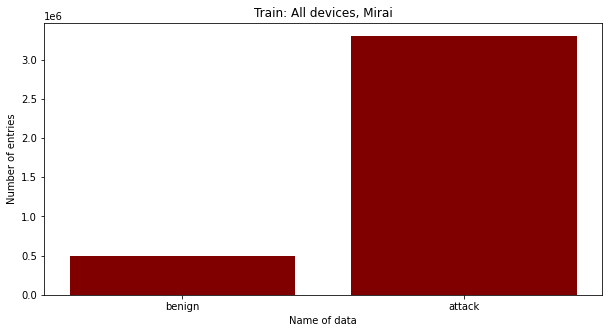

In [12]:
names = ['benign', 'attack']
num = [train[train.Label == 1].shape[0], train[train.Label == -1].shape[0]] 
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
 
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Train: All devices, Mirai")
plt.show()

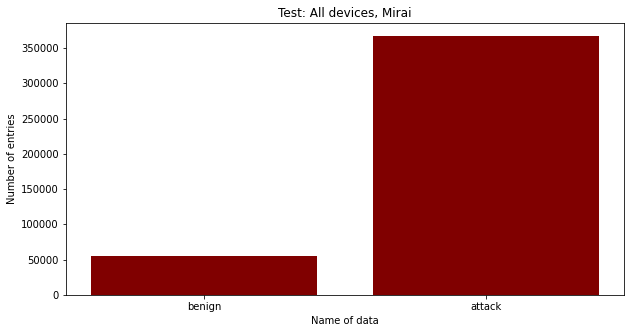

In [13]:
names = ['benign', 'attack']
num = [test[test.Label == 1].shape[0], test[test.Label == -1].shape[0]] 
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, num, color ='maroon')
 
plt.xlabel("Name of data")
plt.ylabel("Number of entries")
plt.title("Test: All devices, Mirai")
plt.show()

In [14]:
import scipy.stats

def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts(normalize=True)           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data, base=2)  # get entropy from counts
    return entropy

entropies = []
for col in train.columns:
    entropies.append((col, ent(train[col])))

entropies.sort(key=lambda tup: tup[1], reverse=True)

for i in range(len(entropies)):
  print(entropies[i][0], entropies[i][1])

H_L0.01_weight 20.880618874663696
MI_dir_L0.01_weight 20.88055209241131
H_L0.1_weight 20.879125427645786
MI_dir_L0.1_weight 20.87880629845813
H_L0.01_variance 20.843417558728856
MI_dir_L0.01_variance 20.843253760199428
H_L0.01_mean 20.83953367040847
MI_dir_L0.01_mean 20.839406159592855
H_L0.1_variance 20.837421543203455
MI_dir_L0.1_variance 20.836954651660708
H_L0.1_mean 20.833414976247123
MI_dir_L0.1_mean 20.83320696759144
HH_jit_L0.1_mean 20.793076767845893
HH_jit_L0.01_mean 20.793003791436846
HH_jit_L1_mean 20.788242923280226
HH_jit_L3_mean 20.78725049367826
HH_jit_L5_mean 20.78713736257699
H_L1_weight 20.78069848178093
MI_dir_L1_weight 20.780519183806803
H_L1_variance 20.775932627217646
MI_dir_L1_variance 20.775716201512363
H_L1_mean 20.68741268607115
MI_dir_L1_mean 20.68732583072366
H_L3_weight 20.57256562351612
MI_dir_L3_weight 20.572471574998044
H_L5_weight 20.39173569244536
MI_dir_L5_weight 20.39168647786325
H_L3_variance 20.239777542066268
MI_dir_L3_variance 20.239613607818438

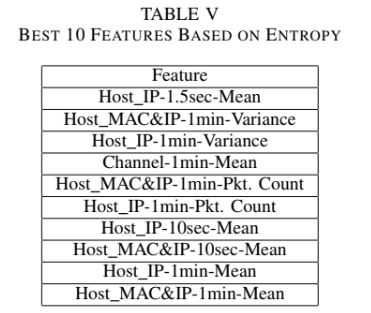

L0.01, L0.1, L1, L3, L5

(100ms, 500ms, 1.5 sec, 10 sec and 1 min)

In [15]:
best_10_features_entropy = [
    'H_L1_mean',
]

In [16]:
df_benign = train.copy(deep=True)
df_benign = df_benign[df_benign.Label == 1]

df_attack = train.copy(deep=True)
df_attack = df_attack[df_attack.Label == -1]

keep_cols = ['Label']
for i in range(3):
  keep_cols.append(entropies[i][0])

for col in df_benign.columns:
  if col not in keep_cols:
    df_benign.drop(col, axis=1, inplace=True)
    df_attack.drop(col, axis=1, inplace=True)

print(len(df_benign.columns))
print(len(df_attack.columns))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


4
4


In [17]:
# num_normal = 2747
num_attack = 20292 
num_test = 30000
num_normal = 40000

df_benign = df_benign.sample(n=num_normal, random_state=4)
df_attack = df_attack.sample(n=num_attack, random_state=5)

# X_train = pd.concat([df_benign, df_attack])
X_train = df_benign
y_train = X_train['Label']
X_train.drop('Label', axis=1, inplace=True)

X_test = test.copy(deep=True)
X_test = X_test.sample(n=num_test, random_state=6)
y_test = X_test['Label']
X_test.drop('Label', axis=1, inplace=True)
for col in X_test.columns:
  if col not in keep_cols:
    X_test.drop(col, axis=1, inplace=True)



In [18]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = X_train.copy(deep=True)
X_test_normalized = X_test.copy(deep=True)
X_train_normalized[X_train_normalized.columns] = scaler.fit_transform(X_train_normalized)
X_test_normalized[X_test_normalized.columns] = scaler.transform(X_test_normalized)

In [20]:
X_train_normalized.head()

,MI_dir_L0.01_weight,H_L0.1_weight,H_L0.01_weight
58506,-0.232974,-0.248003,-0.232997
78793,0.420864,-0.111211,0.420853
171473,1.572866,1.060506,1.572877
119092,0.984459,0.735022,0.984459
107977,0.483619,-0.081752,0.483609


In [21]:
# clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto') #-1 for outliers, 1 for inliers
# clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)

In [22]:
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto') #-1 for outliers, 1 for inliers
clf.fit(X_train_normalized)
y_pred_train = clf.predict(X_train_normalized)
y_pred_test = clf.predict(X_test_normalized)

In [23]:
print(len(y_test))
print(len(y_pred_test))
print(len(set(y_pred_train)))
print(len(set(y_pred_test)))

30000
30000
2
2


In [24]:
y_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_test]
y_pred_test_new = ['benign' if x == 1 else 'attack' if x == -1 else 'error' for x in y_pred_test]

if 'error' in y_test_new or 'error' in y_pred_test_new:
  print('error')
else:
  print('alls good')

alls good


In [25]:
test_benign_samples = len([x for x in y_test_new if x == 'benign'])
print(f'number of benign samples in y test true: {test_benign_samples}')

pred_benign_samples = len([x for x in y_pred_test_new if x == 'benign'])
print(f'number of benign samples in y test pred: {pred_benign_samples}')

test_att_samples = len([x for x in y_test_new if x == 'attack'])
print(f'number of attack samples in y test true: {test_att_samples}')

pred_att_samples = len([x for x in y_pred_test_new if x == 'attack'])
print(f'number of attack samples in y test pred: {pred_att_samples}')


number of benign samples in y test true: 3894
number of benign samples in y test pred: 3521
number of attack samples in y test true: 26106
number of attack samples in y test pred: 26479


[[ 3520   374]
 [    1 26105]]


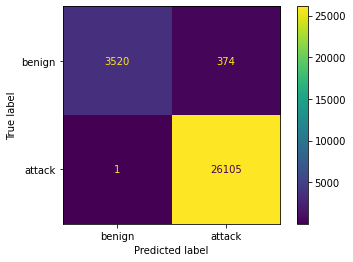

Positive class: attack. Negative class: benign.
Accuracy: 0.9875
Precision: 0.9858755995317043
Recall: 0.9999616946295871


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_new, y_pred_test_new, labels=['benign', 'attack'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
disp.plot()
plt.show()
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print('Positive class: attack. Negative class: benign.')
print(f'Accuracy: {(tp+tn)/(tp+fp+fn+tn)}')
print(f'Precision: {(tp)/(tp+fp)}')
print(f'Recall: {(tp)/(tp+fn)}')